In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [4]:
with np.load("mnist.npz") as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

In [5]:
type(x_train)

numpy.ndarray

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
img_1 = x_train[18]
x_train[500].shape

(28, 28)

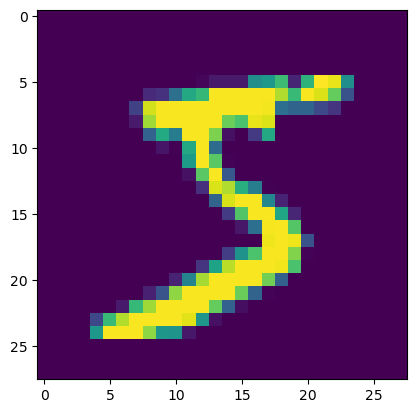

In [8]:
import matplotlib.pyplot as plt
plt.imshow(img_1)

In [9]:
# Normalize the images to a pixel value range of 0 to 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [10]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [12]:
# 2. Build the MLP Model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images to a 1D vector
model.add(Dense(512, activation='relu'))  # Fully connected layer with 512 neurons
model.add(Dense(256, activation='relu'))  # Fully connected layer with 256 neurons
model.add(Dense(10, activation='softmax')) # relu phl dkh ga ki num negative ha postive h phr us run kara g agr negative h tw positive bnya ga or agr postive ha tw negative bnya ga

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=TrueA

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [16]:
# 3. Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# tf.keras.optimizers.Adam(learning_rate=0.001)

In [17]:
# 4. Train the Model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.8922 - loss: 0.3568 - val_accuracy: 0.9572 - val_loss: 0.1456
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9725 - loss: 0.0883 - val_accuracy: 0.9692 - val_loss: 0.1063
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9820 - loss: 0.0556 - val_accuracy: 0.9753 - val_loss: 0.0880
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9872 - loss: 0.0390 - val_accuracy: 0.9737 - val_loss: 0.0990
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9902 - loss: 0.0300 - val_accuracy: 0.9732 - val_loss: 0.1030
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9908 - loss: 0.0277 - val_accuracy: 0.9769 - val_loss: 0.1126
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9925 - loss: 0.0226 - val_accuracy: 0.9784 - val_loss: 0.1069
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 18ms/step - accuracy: 0.9942 -

In [18]:
# PLot the validation and training curvees seperately
def plot_loss_curves(history):
  """
  Returns seperate Loss curves for training and validation metrics
  """
  loss= history.history["loss"]
  val_loss= history.history["val_loss"]

  accuracy= history.history["accuracy"]
  val_accuracy= history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # PLot Loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # PLot accuracy
  plt.figure() # Create a new figure
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

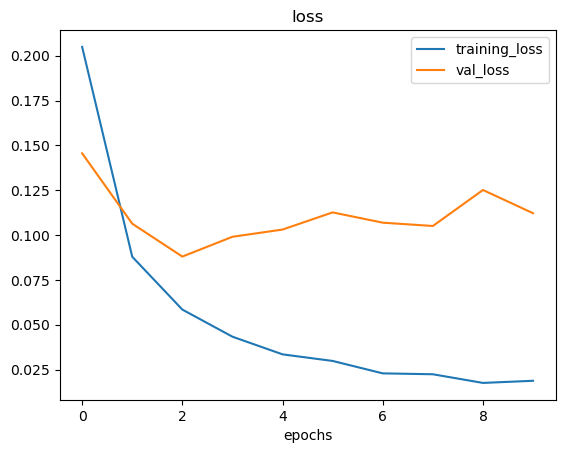

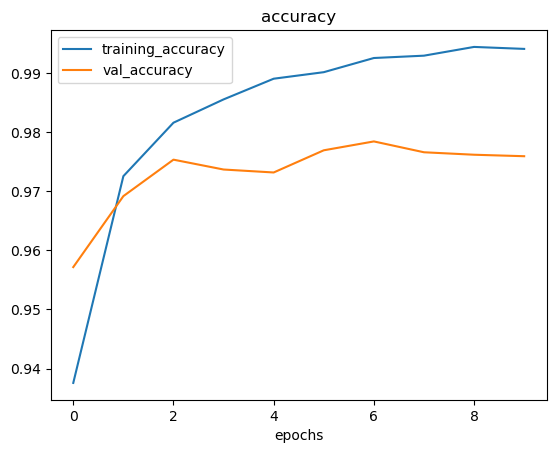

In [19]:
plot_loss_curves(history)

In [20]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


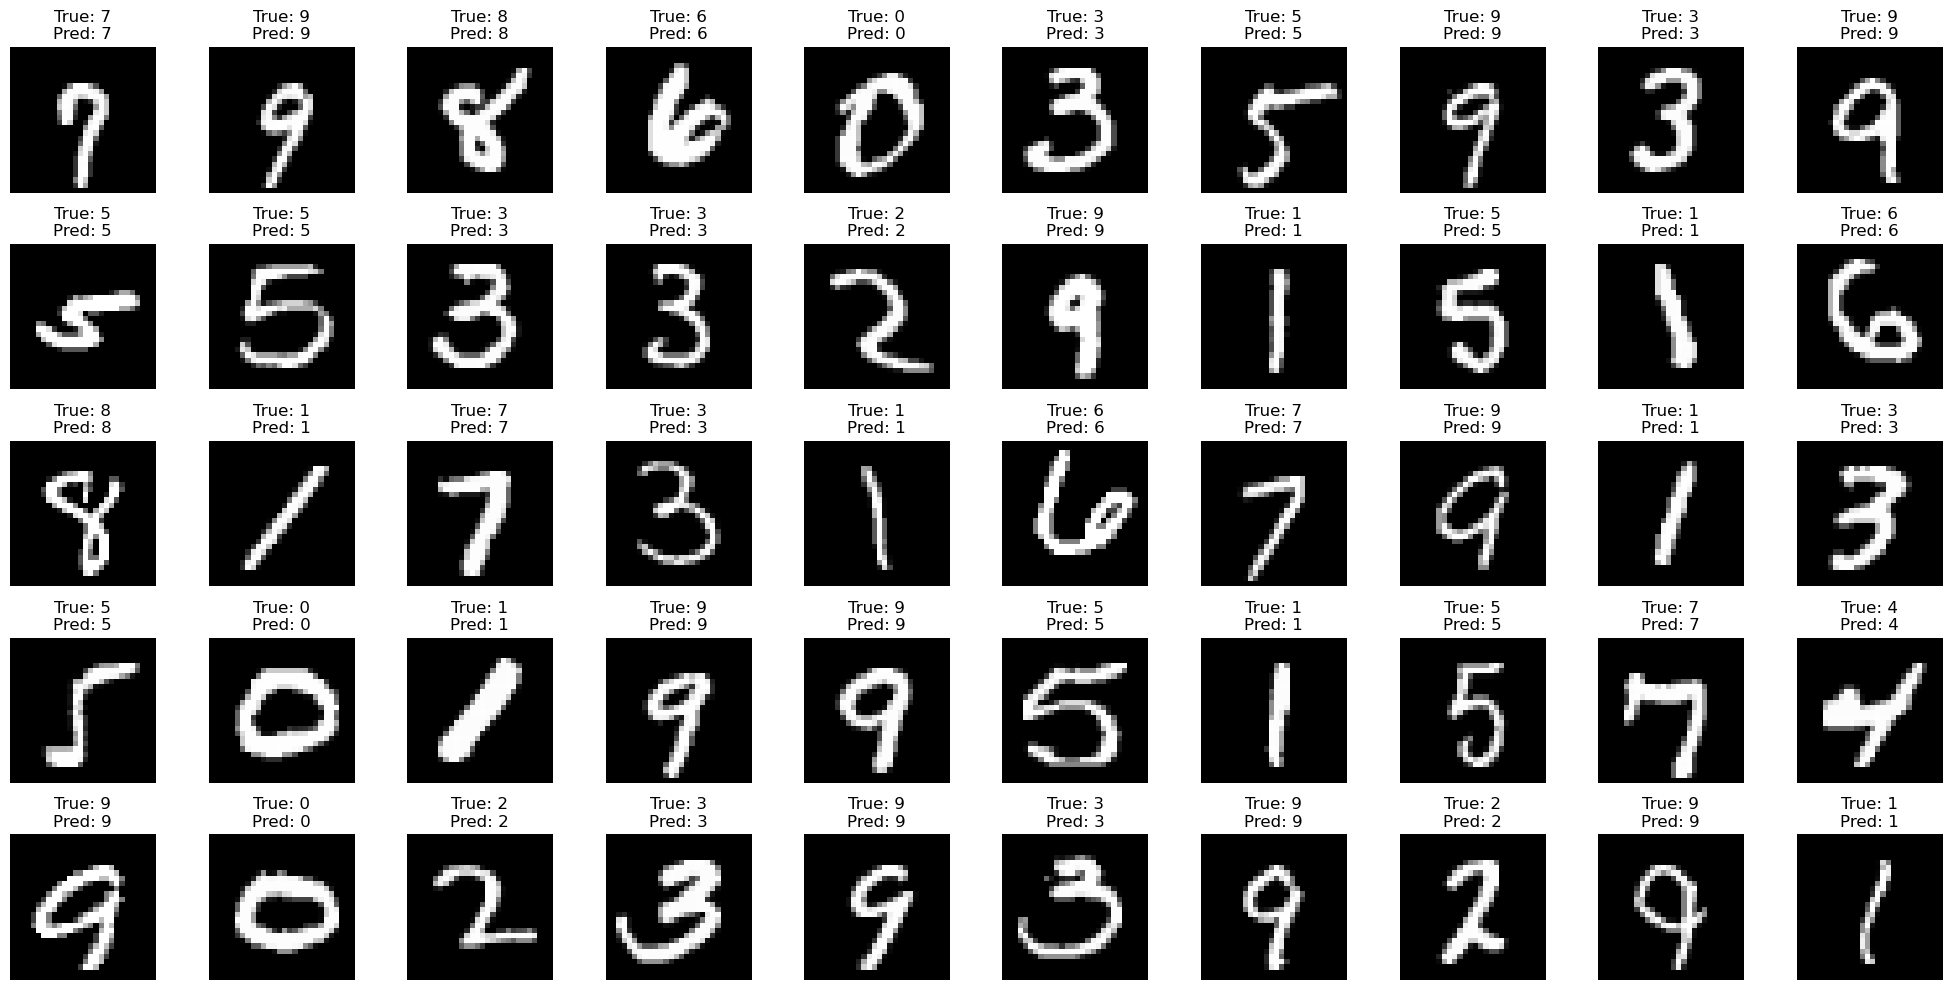

In [21]:
import matplotlib.pyplot as plt

# 1. Select 50 random images from the test set
num_images = 50
random_indices = np.random.choice(x_test.shape[0], num_images, replace=False)
test_images = x_test[random_indices]
true_labels = np.argmax(y_test[random_indices], axis=1)

# 2. Predict the labels for these images
predicted_labels = np.argmax(model.predict(test_images), axis=1)

# 3. Plot the images with their predicted and true labels
plt.figure(figsize=(20, 10))
rows = num_images // 10
for i in range(num_images):
    plt.subplot(rows, 10, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()